In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]

In [3]:
fish_data[4]

[29.0, 430.0]

#### 리스트의 데이터에 접근하는 방법
1. 인덱싱 - ``[7]``
2. 슬라이싱 - ``[0:7]``

In [4]:
fish_target = [1]*35 + [0]*14

In [5]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [6]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input, train_target)

kn.score(test_input, test_target)

0.0

|| 왜? why? 0.0 ?? ||

#### 샘플링 편향

: 훈련 세트와 테스트 세트의 샘플이 한쪽으로 치우친 경우<br>
훈련 세트가 특정 클래스의 샘플이 많을수록 제대로 된 학습모델을 만들기 어려움

해결방법
---> _NumPy_(파이썬 라이브러리) : 고차원 배열로 인코딩하여 사용

#### 넘파이 배열하기

무작위 방식을 이용한 훈련 세트와 테스트 세트 만들기

In [7]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [8]:
type(input_arr)

numpy.ndarray

In [9]:
np.random.seed(41)
index = np.arange(49)    # 0~49까지의 랜덤한 수
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [10]:
np.random.shuffle(index)
index

array([48, 30,  8, 29, 36, 14, 10,  9,  7, 31, 15,  5, 18, 38, 27, 44, 46,
       43,  4, 32, 13, 19, 42, 39,  2, 40, 17, 45, 41, 37, 33, 11, 24, 28,
       22, 20,  6, 47,  3, 26, 21, 23, 25,  1, 16, 34, 12, 35,  0])

In [11]:
input_arr[[0,3]]

array([[ 25.4, 242. ],
       [ 29. , 363. ]])

In [12]:
index[:35]

array([48, 30,  8, 29, 36, 14, 10,  9,  7, 31, 15,  5, 18, 38, 27, 44, 46,
       43,  4, 32, 13, 19, 42, 39,  2, 40, 17, 45, 41, 37, 33, 11, 24, 28,
       22])

In [13]:
index[35:]

array([20,  6, 47,  3, 26, 21, 23, 25,  1, 16, 34, 12, 35,  0])

In [14]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [15]:
train_input.shape

(35, 2)

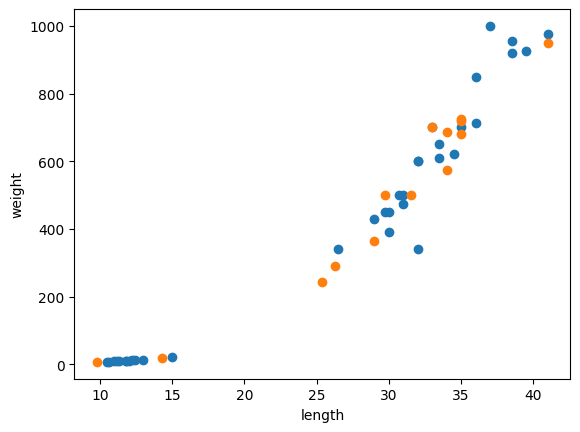

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

파란색 = 학습 데이터<br>
노란색 = 테스트 데이터

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [18]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [19]:
kn.score(fish_data, fish_target)

1.0

In [20]:
kn.predict(test_input)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

#### 지도학습
- 입력(데이터)
- 타겟(정답)

#### 비지도학습
- 입력(데이터)
<br>

- 훈련 세트 : 훈련에 사용하는 데이터
- 테스트 세트 : 평가에 사용하는 데이터